In [1]:
from train import learn_model
from agent_distribution import AgentDistribution
from utils import compute_continuity_noise, fixed_point_interpolation_true_distribution, convert_to_unit_vector
from optimal_beta import optimal_beta_expected_policy_loss 
from reparametrized_gradient import plot_total_derivative

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [2]:
def create_challenging_agent_dist(n, n_types, d):
    gaming_type_etas = np.random.uniform(3., 5., int(n_types * d/2)).reshape(int(n_types/2), d, 1)
    gaming_type_gamma_one = np.random.uniform(0.01, 0.02, int(n_types/2) ).reshape(int(n_types/2), 1, 1)
    gaming_type_gamma_two = np.random.uniform(10., 20., int(n_types/2)).reshape(int(n_types/2), 1, 1)
    gaming_type_gammas = np.hstack((gaming_type_gamma_one, gaming_type_gamma_two))
    
    natural_type_etas = np.random.uniform(5., 7., int(n_types *d/2)).reshape(int(n_types/2), d, 1)
    natural_type_gammas = np.random.uniform(10., 20., int(n_types * d/2)).reshape(int(n_types/2), d, 1)
    
    etas = np.vstack((gaming_type_etas, natural_type_etas))
    gammas = np.vstack((gaming_type_gammas, natural_type_gammas))
    dic = {"etas": etas, "gammas": gammas}
    agent_dist = AgentDistribution(n=n, d=d, n_types=n_types, types=dic, prop=None)
    return agent_dist

In [3]:
n = 1000000
n_types = 10
d = 2
np.random.seed(0)
agent_dist = create_challenging_agent_dist(n, n_types, d)
sigma = compute_continuity_noise(agent_dist)
q = 0.7
f = fixed_point_interpolation_true_distribution(agent_dist, sigma, q)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:50<00:00,  1.97it/s]

[8.686091663065662, 8.990246778291816, 9.257302309435692, 9.486847243957005, 9.678900455727273, 9.833897022626598, 9.95263552278355, 10.036173778292362, 10.08568179924976, 10.102301458362348, 10.087122074817048, 10.041396674060595, 9.96698093778851, 9.866628182706561, 9.743571949604934, 9.600451643120575, 9.438568136451643, 9.258061882526391, 9.058547623083928, 8.839633894044661, 8.601191113733428, 8.343452207458899, 8.067035379153694, 7.772937728857103, 7.462519843880903, 7.137488289023555, 6.799876274645678, 6.452020560974131, 6.096530200602853, 5.736242003069419, 5.374156391784105, 5.013346766911761, 4.656835116494808, 4.307423437844781, 3.9674645753169377, 3.6385546634659542, 3.3211802686141496, 3.0144989934050317, 2.7165279199785664, 2.4247560210866053, 2.136787527312636, 1.8506657371782036, 1.5648899961633806, 1.2783062872952047, 0.9899958604420466, 0.699205589027067, 0.40532435163902225, 0.10789768083922421, -0.19333066100109014, -0.49836263701384254, -0.806887181912272, -1.1182

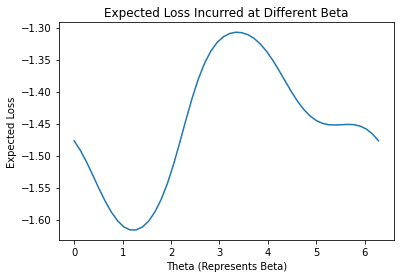

Opt Theta: 1.1540544441758422
Min Loss: -1.6161331288660925


In [4]:
min_loss, opt_beta, opt_s_beta, thetas, losses = optimal_beta_expected_policy_loss(agent_dist, sigma, f, plot=True)
opt_theta = np.arctan2(opt_beta[1], opt_beta[0])
print("Opt Theta: {}".format(opt_theta.item()))
print("Min Loss: {}".format(min_loss))

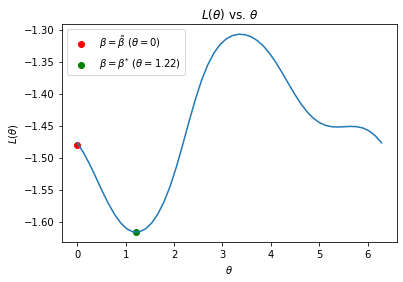

In [5]:
plt.plot(thetas, losses)
plt.scatter([0.], [-1.48], label=r"$\beta = \tilde{\beta}$" + " " + r"$(\theta= 0)$", c="r")
plt.scatter([1.218], [-1.616], label=r"$\beta = \beta^{*}$" + " " + r"$(\theta= 1.22)$", c="g")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$L(\theta)$")
plt.title(r"$L(\theta)$" + " vs. " + r"$\theta$")
plt.legend()

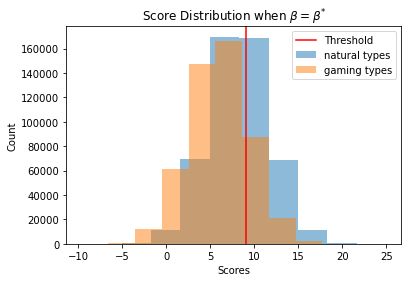

In [6]:
all_br = agent_dist.best_response_noisy_score_distribution(opt_beta, opt_s_beta, sigma)
natural_types_idx = np.where(agent_dist.n_agent_types >= int(n_types/2))
gaming_types_idx = np.where(agent_dist.n_agent_types < int(n_types/2))

plt.hist(all_br[natural_types_idx], label="natural types", alpha=0.5)
plt.hist(all_br[gaming_types_idx], label="gaming types", alpha=0.5)
plt.axvline(x=opt_s_beta, c="r", label="Threshold")
plt.title("Score Distribution when " + r"$\beta = \beta^{*}$")
plt.xlabel("Scores")
plt.ylabel("Count")
plt.legend()

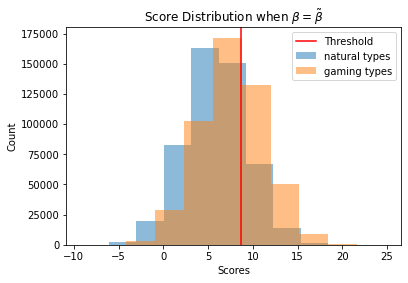

In [7]:
default_theta = 0.
default_beta = convert_to_unit_vector(np.array([default_theta]).reshape(1, 1))
default_s_beta = f(default_theta)
all_br = agent_dist.best_response_noisy_score_distribution(default_beta, default_s_beta, sigma)
natural_types_idx = np.where(agent_dist.n_agent_types >= int(n_types/2))
gaming_types_idx = np.where(agent_dist.n_agent_types < int(n_types/2))
plt.hist(all_br[natural_types_idx], label="natural types", alpha=0.5)
plt.hist(all_br[gaming_types_idx], label="gaming types", alpha=0.5)
plt.axvline(x=default_s_beta, c="r", label="Threshold")
plt.title("Score Distribution when " + r"$\beta = \tilde{\beta}$")
plt.xlabel("Scores")
plt.ylabel("Count")
plt.legend()

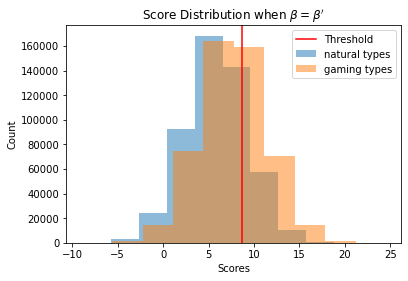

In [8]:
local_min_theta = -0.75
local_min_beta = convert_to_unit_vector(np.array([[default_theta]]))
local_min_s_beta = f(default_theta)
all_br = agent_dist.best_response_noisy_score_distribution(local_min_beta, local_min_s_beta, sigma)
natural_types_idx = np.where(agent_dist.n_agent_types >= int(n_types/2))
gaming_types_idx = np.where(agent_dist.n_agent_types < int(n_types/2))
plt.hist(all_br[natural_types_idx], label="natural types", alpha=0.5)
plt.hist(all_br[gaming_types_idx], label="gaming types", alpha=0.5)
plt.axvline(x=local_min_s_beta, c="r", label="Threshold")
plt.title("Score Distribution when " + r"$\beta = \beta'$")
plt.xlabel("Scores")
plt.ylabel("Count")
plt.legend()
plt.savefig("figs/paper_d.pdf")

0.6876179778268152
0.344979358103609


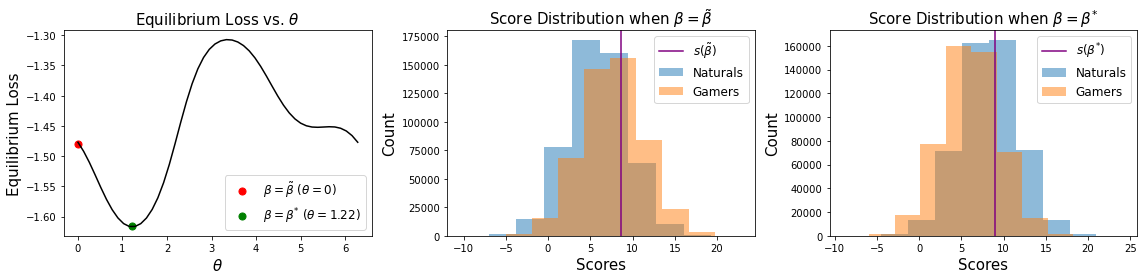

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
thetas = np.linspace(0, 2*np.pi, len(losses))
ax[0].plot(thetas, losses, c="black")
ax[0].scatter([0.], [-1.48], label=r"$\beta = \tilde{\beta}$" + " " + r"$(\theta= 0)$", c="r", s=50, alpha=1)
ax[0].scatter([1.218], [-1.616], label=r"$\beta = \beta^{*}$" + " " + r"$(\theta= 1.22)$", c="g", s=50, alpha=1)
ax[0].set_xlabel(r"$\theta$", fontsize=15)
ax[0].set_ylabel("Equilibrium Loss", fontsize=15)
ax[0].set_title("Equilibrium Loss" + " vs. " + r"$\theta$", fontsize=15)
ax[0].legend(fontsize=12)

all_br = agent_dist.best_response_noisy_score_distribution(opt_beta, opt_s_beta, sigma)
natural_types_idx = np.where(agent_dist.n_agent_types >= int(n_types/2))
gaming_types_idx = np.where(agent_dist.n_agent_types < int(n_types/2))

ax[2].hist(all_br[natural_types_idx], label="Naturals", alpha=0.5)
ax[2].hist(all_br[gaming_types_idx], label="Gamers", alpha=0.5)
ax[2].axvline(x=opt_s_beta, c="purple", label=r"$s(\beta^{*})$")
ax[2].set_title("Score Distribution when " + r"$\beta = \beta^{*}$", fontsize=15)
ax[2].set_xlabel("Scores", fontsize=15)
ax[2].set_ylabel("Count", fontsize=15)
ax[2].legend(fontsize=12)

nat_above = all_br[natural_types_idx] > opt_s_beta
gam_above = all_br[gaming_types_idx] > opt_s_beta

print(nat_above.sum()/ (nat_above.sum() + gam_above.sum()))

default_theta = 0.
default_beta = convert_to_unit_vector(np.array([default_theta]).reshape(1,1))
default_s_beta = f(default_theta)

all_br = agent_dist.best_response_noisy_score_distribution(default_beta, default_s_beta, sigma)
natural_types_idx = np.where(agent_dist.n_agent_types >= int(n_types/2))
gaming_types_idx = np.where(agent_dist.n_agent_types < int(n_types/2))

nat_above = all_br[natural_types_idx] > default_s_beta
gam_above = all_br[gaming_types_idx] > default_s_beta

print(nat_above.sum()/ (nat_above.sum() + gam_above.sum()))

ax[1].hist(all_br[natural_types_idx], label="Naturals", alpha=0.5)
ax[1].hist(all_br[gaming_types_idx], label="Gamers", alpha=0.5)
ax[1].axvline(x=default_s_beta, c="purple", label=r"$s(\tilde{\beta})$")
ax[1].set_title("Score Distribution when " + r"$\beta = \tilde{\beta}$", fontsize=15)
ax[1].set_xlabel("Scores", fontsize=15)
ax[1].set_ylabel("Count", fontsize=15)
ax[1].legend(fontsize=12)

plt.tight_layout()

plt.savefig("figs/paper_plot.pdf")

In [77]:
opt_beta

array([[0.34536505],
       [0.93846842]])

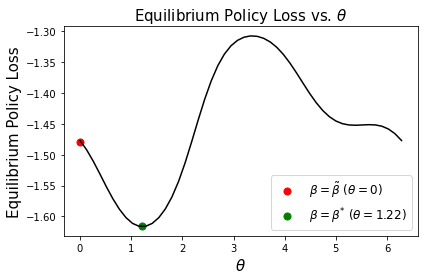

In [18]:
thetas = np.linspace(0, 2*np.pi, len(losses))
plt.plot(thetas, losses, c="black")
plt.scatter([0.], [-1.48], label=r"$\beta = \tilde{\beta}$" + " " + r"$(\theta= 0)$", c="r", s=50, alpha=1)
plt.scatter([1.218], [-1.616], label=r"$\beta = \beta^{*}$" + " " + r"$(\theta= 1.22)$", c="g", s=50, alpha=1)
plt.xlabel(r"$\theta$", fontsize=15)
plt.ylabel("Equilibrium Policy Loss", fontsize=15)
plt.title("Equilibrium Policy Loss" + " vs. " + r"$\theta$", fontsize=15)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("figs/poster1.pdf")


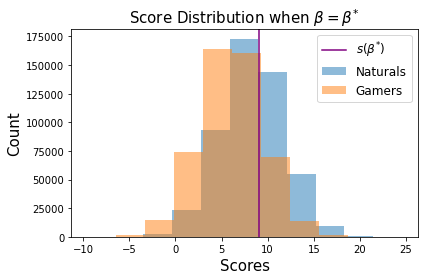

In [19]:
all_br = agent_dist.best_response_noisy_score_distribution(opt_beta, opt_s_beta, sigma)
natural_types_idx = np.where(agent_dist.n_agent_types >= int(n_types/2))
gaming_types_idx = np.where(agent_dist.n_agent_types < int(n_types/2))

plt.hist(all_br[natural_types_idx], label="Naturals", alpha=0.5)
plt.hist(all_br[gaming_types_idx], label="Gamers", alpha=0.5)
plt.axvline(x=opt_s_beta, c="purple", label=r"$s(\beta^{*})$")
plt.title("Score Distribution when " + r"$\beta = \beta^{*}$", fontsize=15)
plt.xlabel("Scores", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("figs/poster2.pdf")

0.3453645670287804


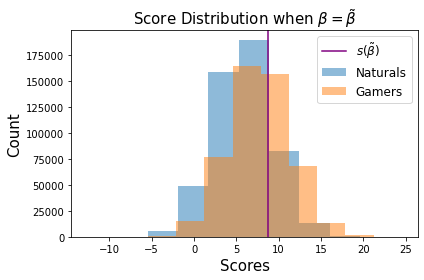

In [20]:
default_theta = 0.
default_beta = convert_to_unit_vector(np.array([default_theta]).reshape(1,1))
default_s_beta = f(default_theta)

all_br = agent_dist.best_response_noisy_score_distribution(default_beta, default_s_beta, sigma)
natural_types_idx = np.where(agent_dist.n_agent_types >= int(n_types/2))
gaming_types_idx = np.where(agent_dist.n_agent_types < int(n_types/2))

nat_above = all_br[natural_types_idx] > default_s_beta
gam_above = all_br[gaming_types_idx] > default_s_beta

print(nat_above.sum()/ (nat_above.sum() + gam_above.sum()))
plt.hist(all_br[natural_types_idx], label="Naturals", alpha=0.5)
plt.hist(all_br[gaming_types_idx], label="Gamers", alpha=0.5)
plt.axvline(x=default_s_beta, c="purple", label=r"$s(\tilde{\beta})$")
plt.title("Score Distribution when " + r"$\beta = \tilde{\beta}$", fontsize=15)
plt.xlabel("Scores", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("figs/poster3.pdf")

0.6885998826791809
0.3457241269037562


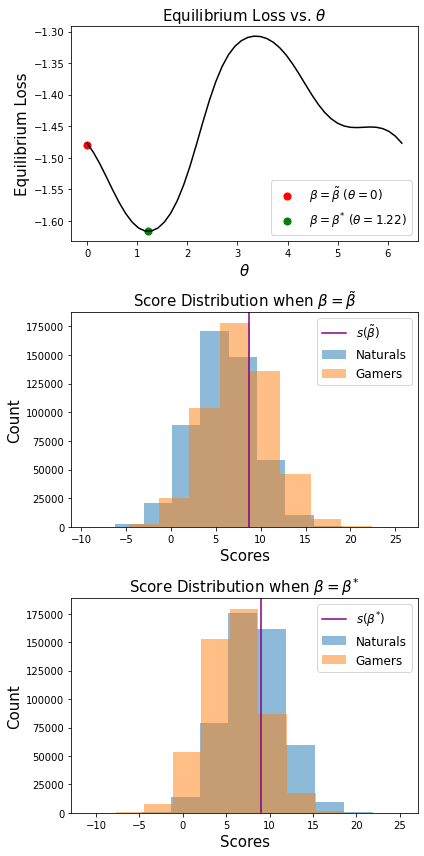

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(6, 12))
thetas = np.linspace(0, 2*np.pi, len(losses))
ax[0].plot(thetas, losses, c="black")
ax[0].scatter([0.], [-1.48], label=r"$\beta = \tilde{\beta}$" + " " + r"$(\theta= 0)$", c="r", s=50, alpha=1)
ax[0].scatter([1.218], [-1.616], label=r"$\beta = \beta^{*}$" + " " + r"$(\theta= 1.22)$", c="g", s=50, alpha=1)
ax[0].set_xlabel(r"$\theta$", fontsize=15)
ax[0].set_ylabel("Equilibrium Loss", fontsize=15)
ax[0].set_title("Equilibrium Loss" + " vs. " + r"$\theta$", fontsize=15)
ax[0].legend(fontsize=12)

all_br = agent_dist.best_response_noisy_score_distribution(opt_beta, opt_s_beta, sigma)
natural_types_idx = np.where(agent_dist.n_agent_types >= int(n_types/2))
gaming_types_idx = np.where(agent_dist.n_agent_types < int(n_types/2))

ax[2].hist(all_br[natural_types_idx], label="Naturals", alpha=0.5)
ax[2].hist(all_br[gaming_types_idx], label="Gamers", alpha=0.5)
ax[2].axvline(x=opt_s_beta, c="purple", label=r"$s(\beta^{*})$")
ax[2].set_title("Score Distribution when " + r"$\beta = \beta^{*}$", fontsize=15)
ax[2].set_xlabel("Scores", fontsize=15)
ax[2].set_ylabel("Count", fontsize=15)
ax[2].legend(fontsize=12)

nat_above = all_br[natural_types_idx] > opt_s_beta
gam_above = all_br[gaming_types_idx] > opt_s_beta

print(nat_above.sum()/ (nat_above.sum() + gam_above.sum()))

default_theta = 0.
default_beta = convert_to_unit_vector(np.array([default_theta]).reshape(1,1))
default_s_beta = f(default_theta)

all_br = agent_dist.best_response_noisy_score_distribution(default_beta, default_s_beta, sigma)
natural_types_idx = np.where(agent_dist.n_agent_types >= int(n_types/2))
gaming_types_idx = np.where(agent_dist.n_agent_types < int(n_types/2))

nat_above = all_br[natural_types_idx] > default_s_beta
gam_above = all_br[gaming_types_idx] > default_s_beta

print(nat_above.sum()/ (nat_above.sum() + gam_above.sum()))

ax[1].hist(all_br[natural_types_idx], label="Naturals", alpha=0.5)
ax[1].hist(all_br[gaming_types_idx], label="Gamers", alpha=0.5)
ax[1].axvline(x=default_s_beta, c="purple", label=r"$s(\tilde{\beta})$")
ax[1].set_title("Score Distribution when " + r"$\beta = \tilde{\beta}$", fontsize=15)
ax[1].set_xlabel("Scores", fontsize=15)
ax[1].set_ylabel("Count", fontsize=15)
ax[1].legend(fontsize=12)

plt.tight_layout()

plt.savefig("figs/poster_plot.pdf")